##**Домашнее задание на тему  "Классификация и кластеризация "**

**Задание 1:**

Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.

Описание датасета:

case: observation number
site: The site number where the possum was trapped.
Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).
sex: Gender, either m (male) or f (female).
age: Age.
hdlngth: Head length, in mm.
skullw: Skull width, in mm.
totlngth: Total length, in cm.
taill: Tail length, in cm.
footlgth: foot length
earconch: ear conch length
eye: distance from medial canthus to lateral canthus of right eye
chest: chest girth (in cm)
belly: belly girth (in cm)
Для выполнения задания:

Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
Постройте модель LDA
Рассчитайте точность вашей модели на тестовой выборке

**Задание 2:**

Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия.

Описание датасета:

country: Name of the country
child_mort: Death of children under 5 years of age per 1000 live births
exports: Exports of goods and services per capita. Given as %age of the GDP per capita
health: Total health spending per capita. Given as %age of GDP per capita
imports: Imports of goods and services per capita. Given as %age of the GDP per capita
income: Net income per person
inflation: The measurement of the annual growth rate of the Total GDP
life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.
Для выполнения задания:

Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
Подберите оптимальное число кластеров для алгоритма K-means.
Визуализируйте полученную кластеризацию.
Проверьте правильность выбора кластеров с помощью метода локтя.
Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
Визуализируйте результат.
Желательно, но не обязательно:
Попробуйте провести кластеризацию с помощью других столбцов в наборе, оцените результаты.



**Решение:**

Задание 1
Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.

Для выполнения задания:

Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
Постройте модель LDA
Рассчитайте точность вашей модели на тестовой выборке

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df1 = pd.read_csv('possum.csv')
df1

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
df1.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
# Заполняем пропуски в столбцах age и footlgth средним:
df1['age'].fillna(df1.groupby('Pop')['age'].transform('median'), inplace=True)
df1['footlgth'].fillna(df1.groupby('Pop')['footlgth'].transform('median'), inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


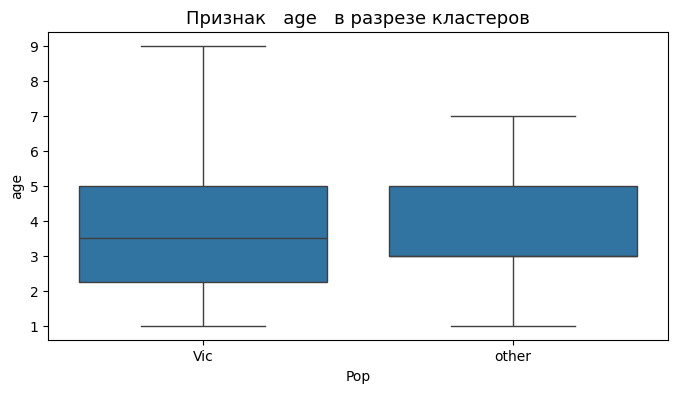

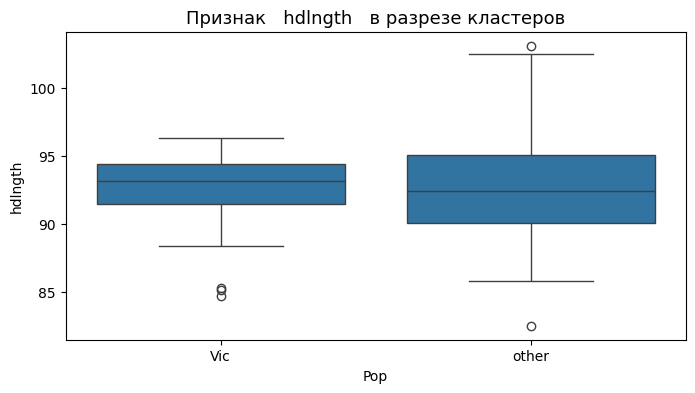

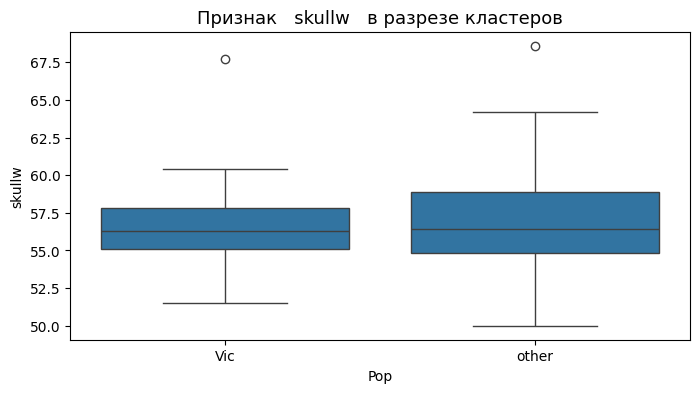

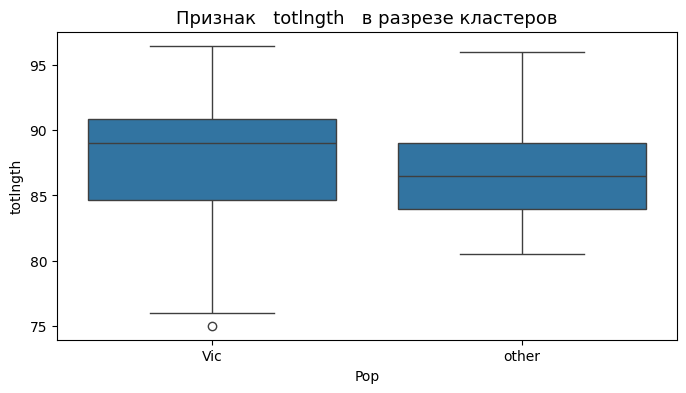

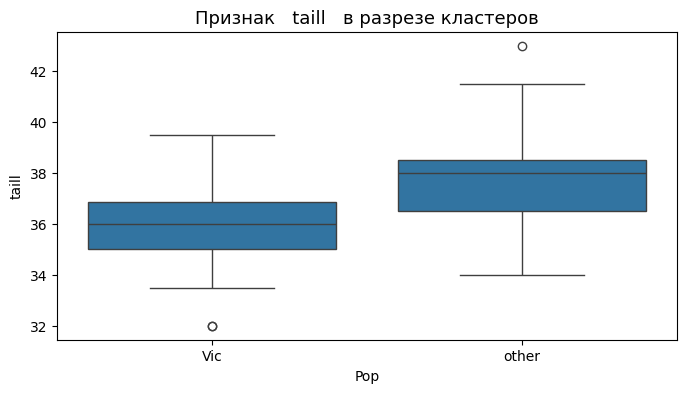

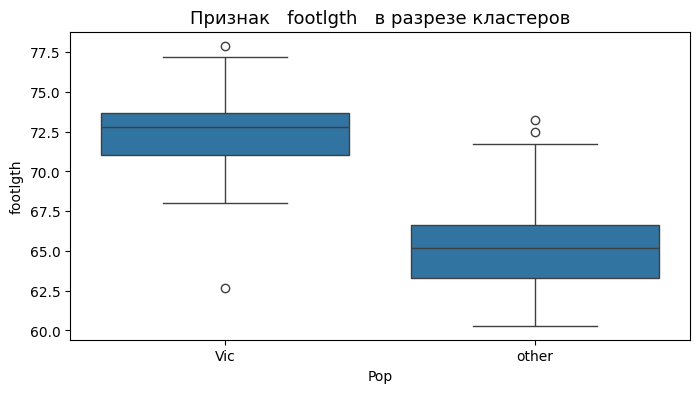

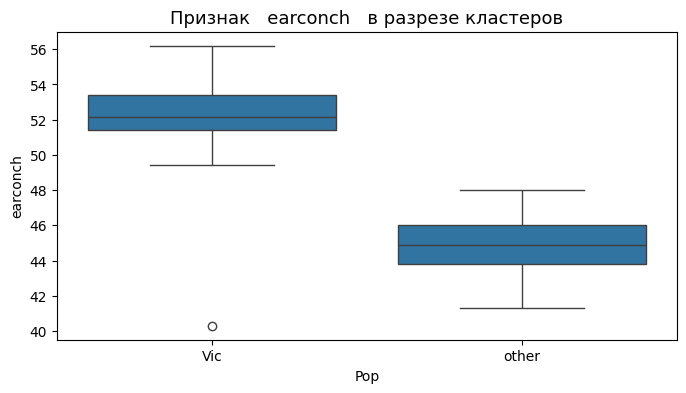

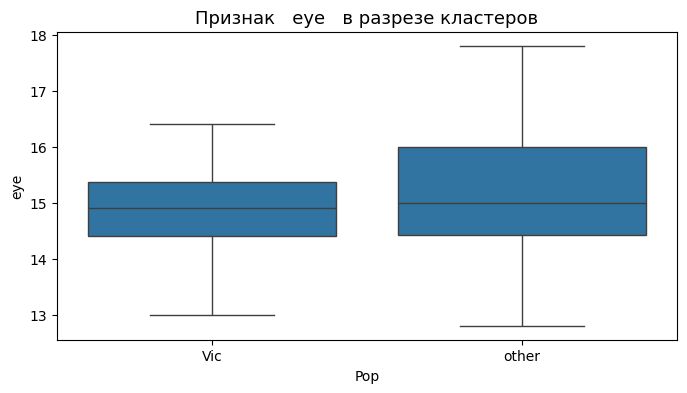

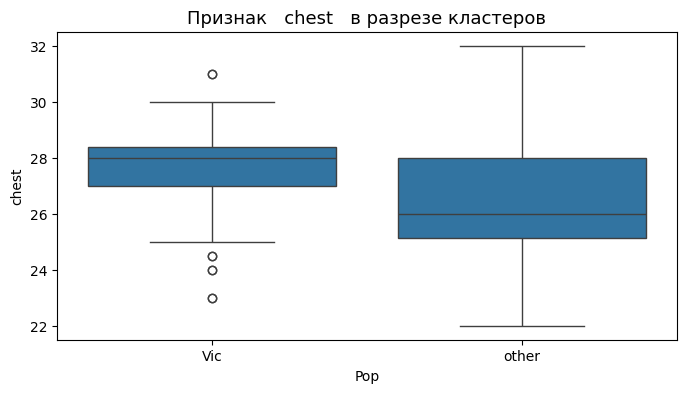

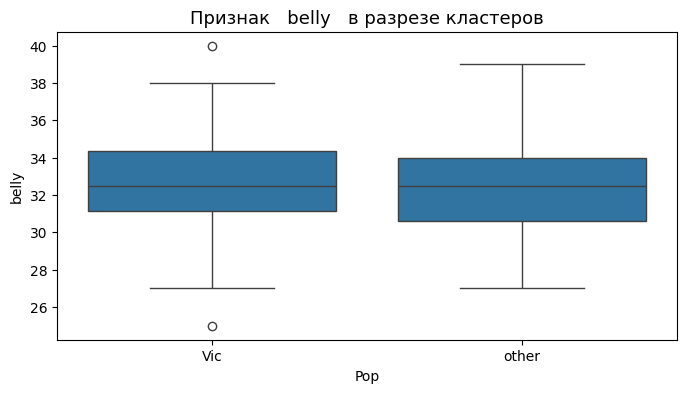

In [ ]:
# Посмотрим признаки в разере кластеров:
for col in df1.select_dtypes(include='float64').columns:
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title('Признак   ' + col + '   в разрезе кластеров', fontsize = 13)
    ax = sns.boxplot(data = df1,  x = 'Pop', y = col);
    ax.yaxis.grid = True
    plt.show()

На графиках видны выбросы.

<Axes: >

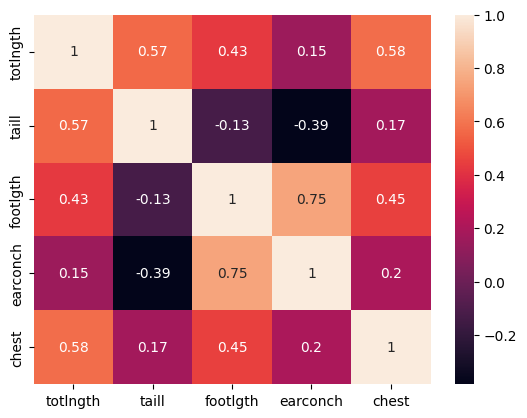

In [ ]:
# Признаки для LDA
col_LDA = ['totlngth', 'taill', 'footlgth', 'earconch', 'chest']
# Проверим корреляцию между ними
sns.heatmap(df1[col_LDA].corr(), annot=True)

'footlgth'и 'earconch' сильно коррелируют. Из них оставим earconch.

In [ ]:
col_LDA = ['totlngth', 'taill', 'earconch', 'chest']

In [ ]:
le = LabelEncoder()
lda = LinearDiscriminantAnalysis()
X = df1[col_LDA]
y = le.fit_transform(df1['Pop'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [ ]:
print_all_metrics(y_test, lda.predict(X_test))

Метрики классификации
	Accuracy: 1.00
	Precision: 1.00
	Recall: 1.00
	F1: 1.00


Задание 2
Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия. Для выполнения задания:

Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
Подберите оптимальное число кластеров для алгоритма K-means.
Визуализируйте полученную кластеризацию.
Проверьте правильность выбора кластеров с помощью метода локтя.
Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
Визуализируйте результат.

In [ ]:
df2 = pd.read_csv('Country-data.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: xlabel='imports', ylabel='exports'>

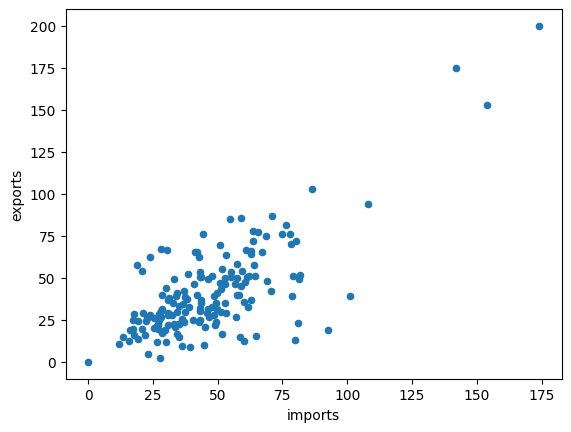

In [ ]:
X = df2[['imports', 'exports']]
X.plot(kind='scatter', x = 'imports', y = 'exports')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

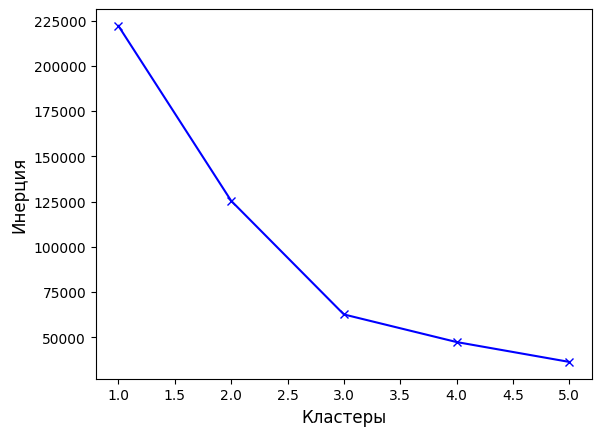

In [ ]:
# Определяем оптимальное количество кластеров
MAX_CLUSTER = 5
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num)
    k_means.fit(X)
    return k_means.inertia_

inertia = []
for cluster_num in range(1, MAX_CLUSTER + 1):
    inertia.append(get_inertia(cluster_num, X))

plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, MAX_CLUSTER + 1)], inertia, 'xb-')
plt.show()

По графику видно, что оптимально - 4 кластера

In [ ]:
km2 = KMeans(n_clusters=4)
clusters = km2.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X['cluster'] = clusters
X

<ipython-input-48-bc66717031d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = clusters


,imports,exports,cluster
0,44.9,10.0,2
1,48.6,28.0,1
2,31.4,38.4,2
3,42.9,62.3,1
4,58.9,45.5,1
...,...,...,...
162,52.7,46.6,1
163,17.6,28.5,2
164,80.2,72.0,0
165,34.4,30.0,2


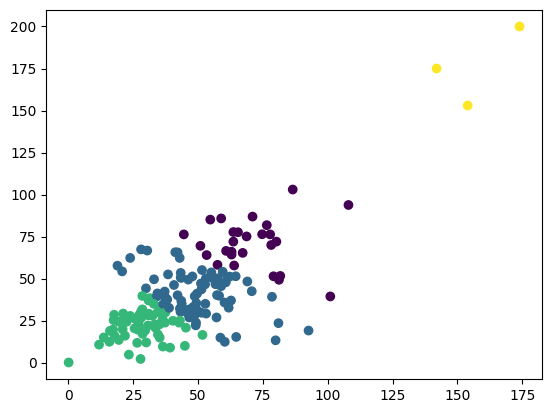

In [ ]:
plt.scatter(X['imports'], X['exports'] , c=X['cluster'])